In [1]:
import os
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend([os.path.abspath('..')])

Python 3.10.12 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 19:01:18) [MSC v.1916 64 bit (AMD64)] on win32


In [2]:
from denoising.denoise import Denoising
from denoising.atlas import Atlas
from denoising.dataset import Dataset
from denoising.helpers import *

from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Denoising of fMRIprep output



### Create Dataset instance



In [3]:
# paste derivatives path
derivatives_path = r'C:\Users\user\Desktop\open_close_001\derivatives'

# enter number of runs
runs = 2

# enter task name
task = 'rest'



data = Dataset(derivatives_path=derivatives_path, 
               runs=runs,
               task=task)

### Create Atlas instance

3 atlases are implemented:
1. `HCPex`, 426 ROI 
2. `Schaefer200`, 200 ROI
3. `AAL`, 116 ROI

In [4]:
# enter atlas name
atlas_name = 'HCPex'

atlas = Atlas(atlas_name=atlas_name)

## Denoising

### 5 strategies:

1. 24 parameters: 6 motion parameters, 6 temporal derivatives, 6 quadratic terms, and 6 quadratic expansions of the derivatives of motion estimates for a total 24 regressors;

2. aCompCor + 12P: 10 principal components calculated using a white matter and CSF combined anatomical mask, in addition to motion estimates and their temporal derivatives;

2. aCompCor50 + 12 parameters: principal components, which explain 50% of variance, calculated using a white matter and CSF combined anatomical mask, in addition to motion estimates and their temporal derivatives;

3. aCompCor + 24P: 10 principal components and 24 parameters;

4. aCompCor50 + 24P: same, principal components, which explain 50% of variance are used.

To each strategy global signal regressors (GSR) can be added (4 regressors: the global signal, its derivative, its square, and the derivative of its square). GSR is not used by default. 

By default, we add discrete cosines transformation basis regressors to handle low-frequency signal drifts. Instead, a bandpass filter (0.008 Hz and 0.09 Hz) can be used.

In [9]:
denoise = Denoising(data, atlas, 
                    # enter denoising options here
                    strategy=4, 
                    use_GSR=False, 
                    use_cosine=True, 
                    smoothing=None) 


Denoised time-series are saved as csv files in derivatives directory in time-series folder for every subject. 
Filename contains chosen atlas and strategy number. 

![Alt text](image.png)

In [ ]:
# don't pass any arguments to process all subjects in the directory
ts = denoise.denoise()

In [15]:
# or pass subjects' labels you need

sub_labels = [
    #'001',
    '002',
]

ts = denoise.denoise(sub_labels)

  0%|          | 0/1 [00:00<?, ?it/s]

[NiftiLabelsMasker.wrapped] loading data from c:\Users\user\Desktop\OpenCloseProject\atlas\HCPex.nii
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('C:\\Users\\user\\Desktop\\open_close_001\\derivatives\\sub-002\\func\\sub-002_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz', 
{ 'background_label': 0,
  'clean_kwargs': {},
  'detrend': True,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': array(['Primary_Visual_Cortex_L', ..., 'Nuclei_basal_R'], dtype=object),
  'labels_img': 'c:\\Users\\user\\Desktop\\OpenCloseProject\\atlas\\HCPex.nii',
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': array([[   1.,    0.,    0.,  -96.],
       [   0.,    1.,    0., -1

### Compute functional connectivity

In [12]:
fc = functional_connectivity(ts)

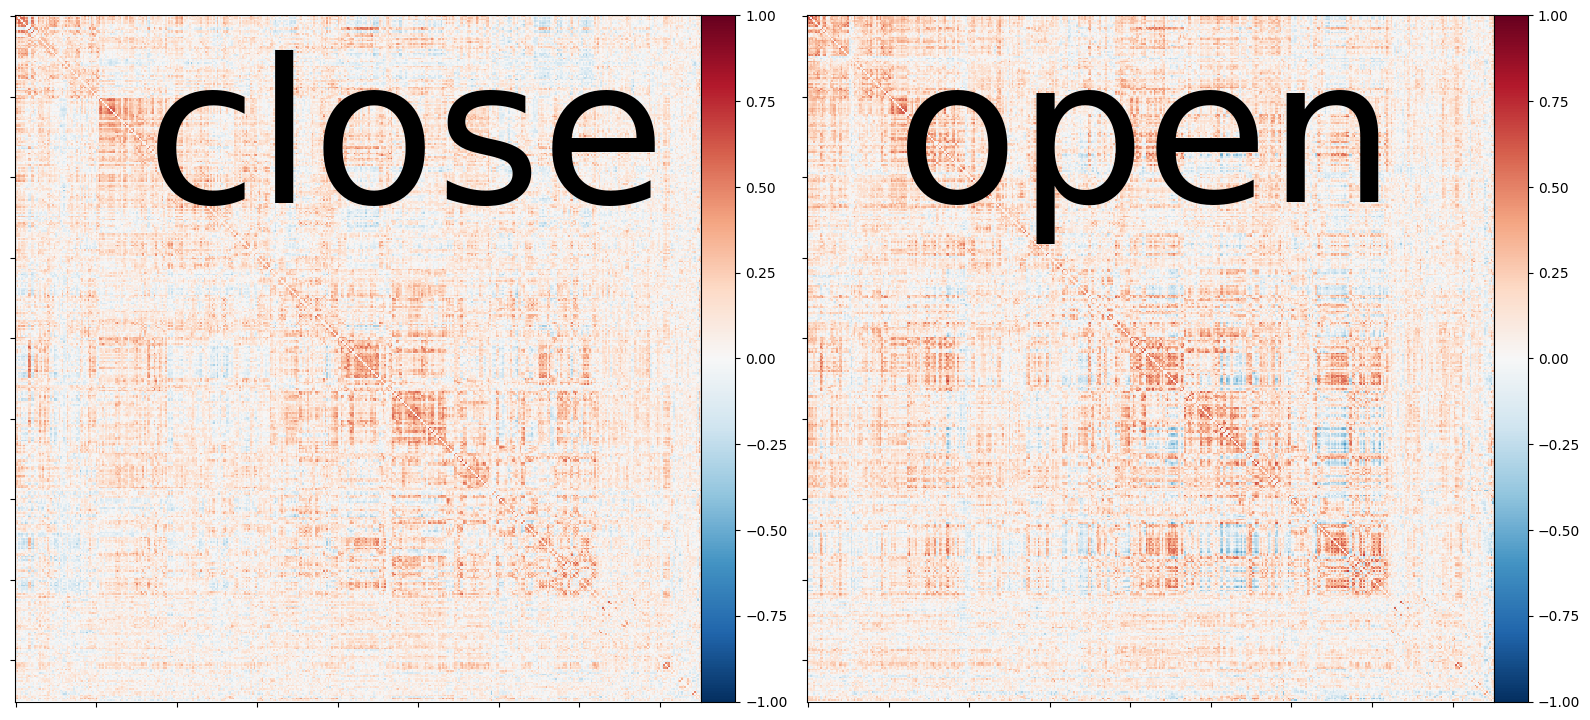

In [14]:
from nilearn import plotting

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

plotting.plot_matrix(
    reorder_matrix(fc[0][0], atlas_name='HCPex') ,
    labels=None,
    vmax=1,
    vmin=-1,
    title="close",
    reorder=False, axes=ax1)

plotting.plot_matrix(
    reorder_matrix(fc[0][1], atlas_name='HCPex'),
    labels=None,
    vmax=1,
    vmin=-1,
    title="open ", 
    reorder=False, axes=ax2);
